In [210]:
import pandas as pd
import numpy as np
import seaborn as sn
import params
import matplotlib.pyplot as plt

data_path = '/n/fs/fgvc/cos534/data/'
mimic_path = '/n/fs/fgvc/mimiciv/1.0/'
palette = sn.color_palette('hls', 12)
sn.set_style('darkgrid')
sn.set(font_scale=2)

In [191]:
melanoma_cohort = pd.read_csv(data_path+'melanoma_cohort.csv')
heart_cohort = pd.read_csv(data_path+'heart_cohort.csv')
kidney_cohort = pd.read_csv(data_path+'kidney_cohort.csv')
flu_cohort = pd.read_csv(data_path+'flu_cohort.csv')

patients = pd.read_csv(mimic_path+'core/patients.csv')
core = pd.read_csv(mimic_path+'core/admissions.csv')

In [69]:
patients.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000048,F,23,2126,2008 - 2010,NaN
1,10002723,F,0,2128,2017 - 2019,NaN
2,10003939,M,0,2184,2008 - 2010,NaN
3,10004222,M,0,2161,2014 - 2016,NaN
4,10005325,F,0,2154,2011 - 2013,NaN


In [76]:
len(patients)

382278

In [77]:
len(core)

523740

In [78]:
len(core.subject_id.unique())

256878

In [74]:
joined_adm = patients.set_index('subject_id').join(core.set_index('subject_id'), how='right').set_index('hadm_id')

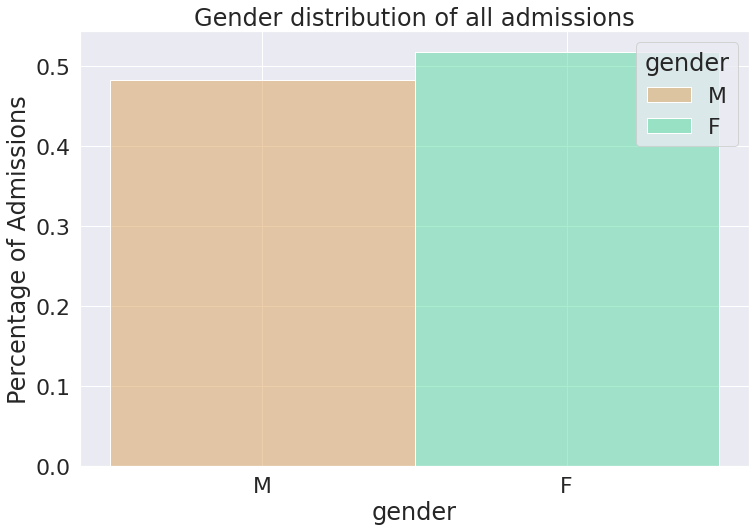

In [223]:
plt.figure(figsize=(12,8))
ax = sn.histplot(data=joined_adm, x='gender', palette=[palette[1], palette[5]], stat='probability', hue='gender')
ax.set(ylabel='Percentage of Admissions')
ax.set_title('Gender distribution of all admissions')
ax.get_figure().savefig('adm_gender.png',bbox_inches='tight')

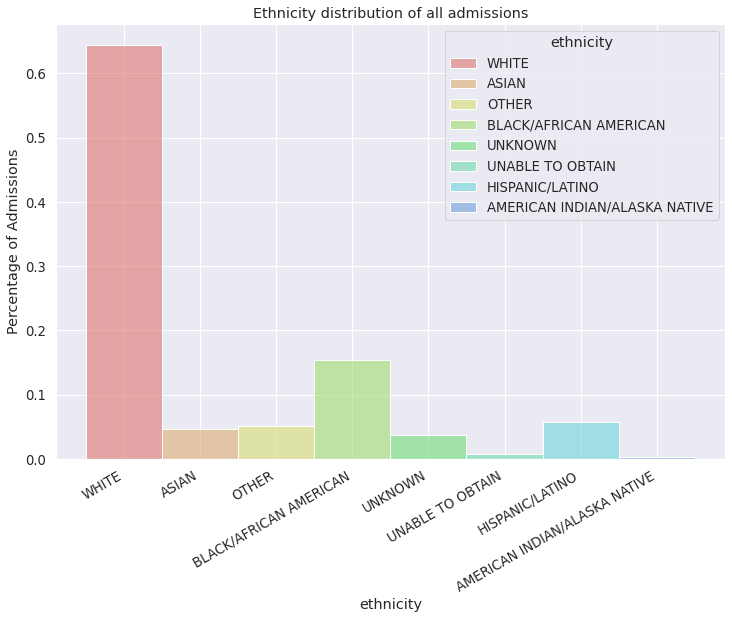

In [224]:
plt.figure(figsize=(12,8))
sn.set(font_scale=1.2)
ax = sn.histplot(data=joined_adm, x='ethnicity', palette=palette[:8], stat='probability', hue='ethnicity')
ax.set(ylabel='Percentage of Admissions')
plt.xticks(rotation=30, ha='right')
ax.set_title('Ethnicity distribution of all admissions')
ax.get_figure().savefig('adm_ethnicity.png',bbox_inches='tight')

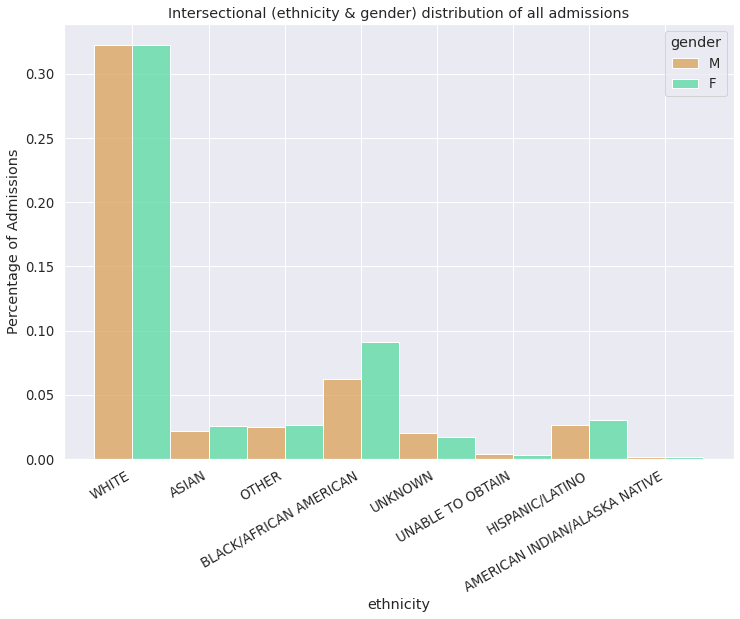

In [225]:
plt.figure(figsize=(12,8))
ax = sn.histplot(data=joined_adm, x='ethnicity', palette=[palette[1], palette[5]], stat='probability', hue='gender',multiple='dodge' )
ax.set(ylabel='Percentage of Admissions')
plt.xticks(rotation=30, ha='right')
ax.set_title('Intersectional (ethnicity & gender) distribution of all admissions')
ax.get_figure().savefig('adm_gender_ethnicity.png',bbox_inches='tight')

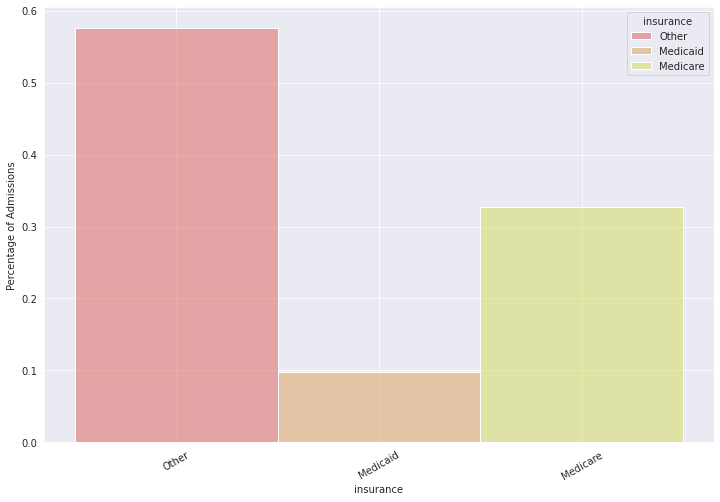

In [160]:
plt.figure(figsize=(12,8))
ax = sn.histplot(data=joined_adm, x='insurance', palette=palette[:3], stat='probability', hue='insurance')
ax.set(ylabel='Percentage of Admissions')
plt.xticks(rotation=30)
ax.get_figure().savefig('adm_insurance.png',bbox_inches='tight')

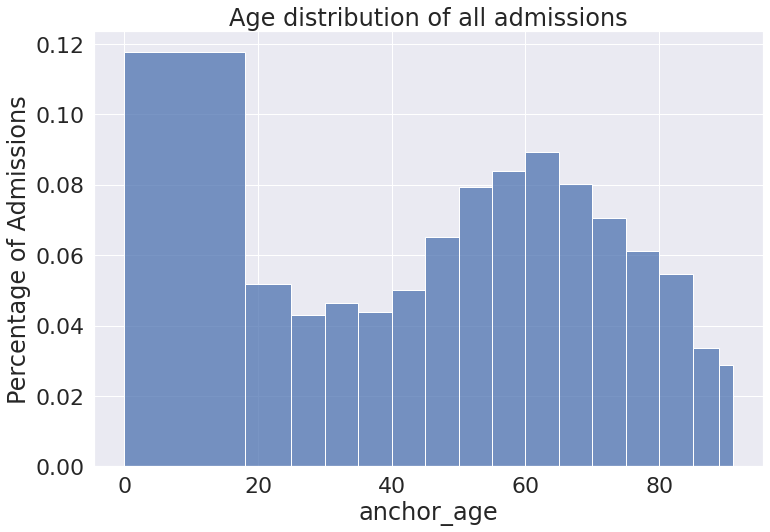

In [226]:
plt.figure(figsize=(12,8))
sn.set(font_scale=2)
ax = sn.histplot(data=joined_adm, x='anchor_age', bins=[0,18,25,30,35,40,45,50,55,60,65,70,75,80,85,89,91], palette=palette, stat='probability')
ax.set(ylabel='Percentage of Admissions')
ax.set_title('Age distribution of all admissions')
# plt.xticks(rotation=30)
ax.get_figure().savefig('adm_ages.png',bbox_inches='tight')

In [169]:
print('Melanoma chrt: ', len(melanoma_cohort))
print('Melanoma hadm: ', len(melanoma_cohort.hadm_id.unique()))
print('Melanoma subj: ', len(melanoma_cohort.subject_id.unique()))

print('Heart chrt: ', len(heart_cohort))
print('Heart hadm: ', len(heart_cohort.hadm_id.unique()))
print('Heart subj: ', len(heart_cohort.subject_id.unique()))

print('Flu chrt: ', len(flu_cohort))
print('Flu hadm: ', len(flu_cohort.hadm_id.unique()))
print('Flu subj: ', len(flu_cohort.subject_id.unique()))

print('Kidney chrt: ', len(kidney_cohort))
print('Kidney hadm: ', len(kidney_cohort.hadm_id.unique()))
print('Kidney subj: ', len(kidney_cohort.subject_id.unique()))

Melanoma chrt:  2587
Melanoma hadm:  519
Melanoma subj:  464
Heart chrt:  29873
Heart hadm:  5922
Heart subj:  5268
Flu chrt:  42430
Flu hadm:  7302
Flu subj:  6587
Kidney chrt:  18761
Kidney hadm:  2346
Kidney subj:  1595


array(['F', 'M'], dtype=object)

In [230]:
def make_demog_plots(df, name):
    df.gender = df.gender.replace(0, 'F')
    df.gender = df.gender.replace(1, 'M')
    plt.figure(figsize=(12,8))
    ax = sn.histplot(data=df, x='gender', palette=[palette[1], palette[5]], stat='probability', hue='gender')
    ax.set(ylabel='Percentage of Admissions')
    ax.set_title(f'Gender distribution of {name} cohort')
    ax.get_figure().savefig(f'{name}_gender.png',bbox_inches='tight')
    plt.show()

    plt.figure(figsize=(12,8))
    sn.set(font_scale=1.2)
    ax = sn.histplot(data=df, x='ethnicity', palette=palette[:len(df.ethnicity.unique())], stat='probability', hue='ethnicity' )
    ax.set(ylabel='Percentage of Cohort')
    plt.xticks(rotation=30, ha='right')
    ax.set_title(f'Ethnicity distribution of {name} cohort')
    ax.get_figure().savefig(f'{name}_ethnicity.png',bbox_inches='tight')
    plt.show()

    plt.figure(figsize=(12,8))
    ax = sn.histplot(data=df, x='ethnicity', palette=[palette[1], palette[5]], stat='probability', hue='gender',multiple='dodge' )
    ax.set(ylabel='Percentage of Cohort')
    plt.xticks(rotation=30, ha='right')
    ax.set_title(f'Intersectional (Ethnicity & Gender) Distribution of {name} cohort')

    ax.get_figure().savefig(f'{name}_gender_ethnicity.png',bbox_inches='tight')
    plt.show()
    
    sn.set(font_scale=2)

    plt.figure(figsize=(12,8))
    ax = sn.histplot(data=df, x='insurance', palette=palette[:3], stat='probability', hue='insurance')
    ax.set(ylabel='Percentage of Cohort')
    plt.xticks(rotation=30)
    ax.get_figure().savefig(f'{name}_insurance.png',bbox_inches='tight')
    plt.show()

    plt.figure(figsize=(12,8))
    ax = sn.histplot(data=df, x='anchor_age', bins=[18,25,30,35,40,45,50,55,60,65,70,75,80,85,89,91], palette=palette, stat='probability')
    ax.set(ylabel='Percentage of Cohort')
    plt.xticks(rotation=30)
    ax.set_title(f'Age distribution of {name} cohort')

    ax.get_figure().savefig(f'{name}_ages.png',bbox_inches='tight')
    plt.show()


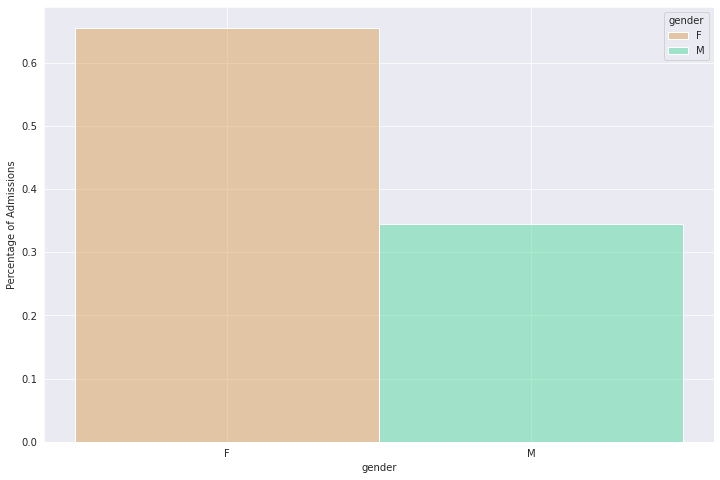

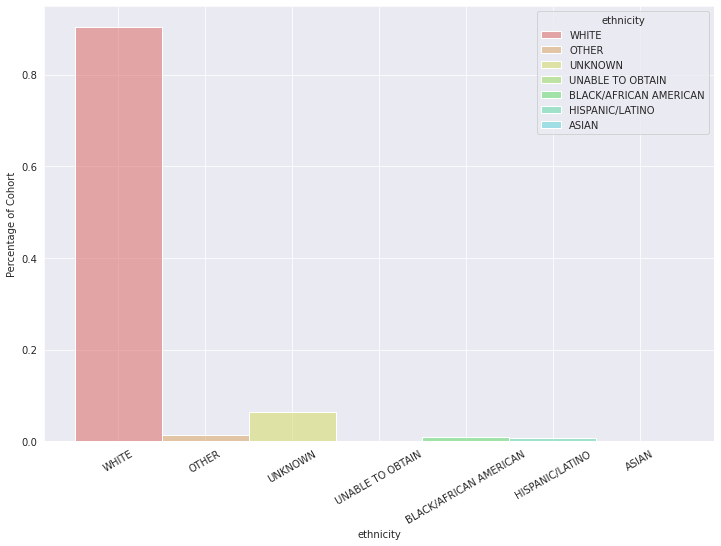

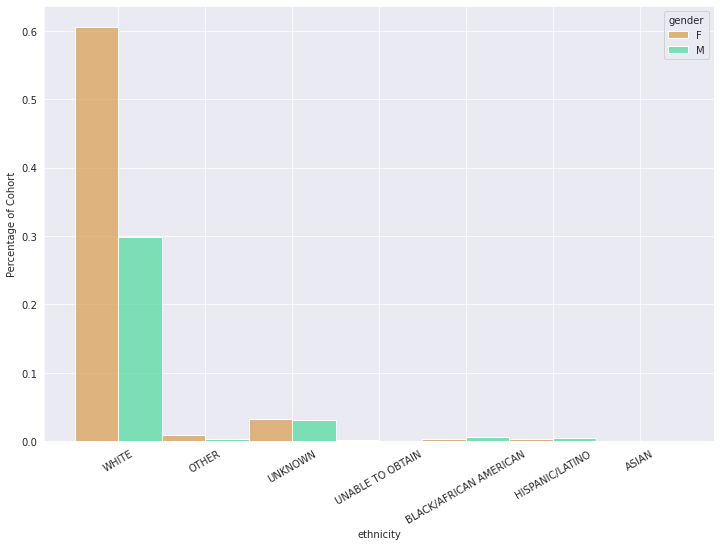

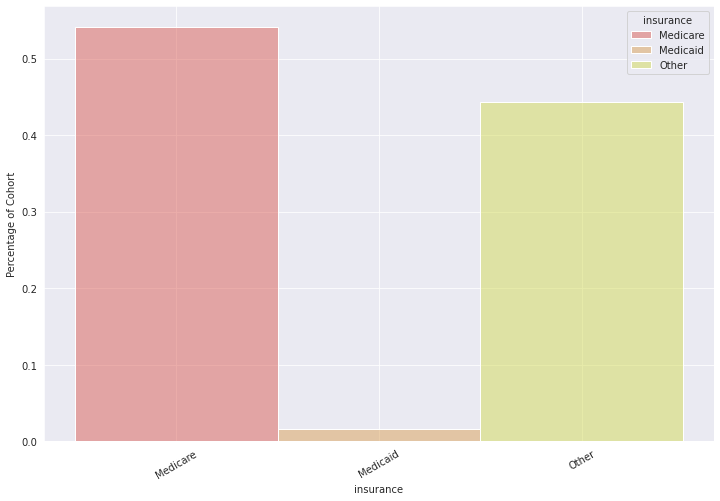

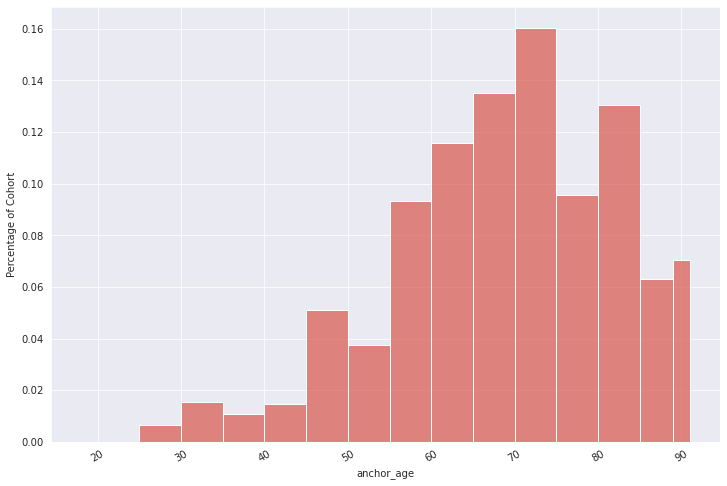

In [199]:
make_demog_plots(melanoma_cohort, 'melanoma')

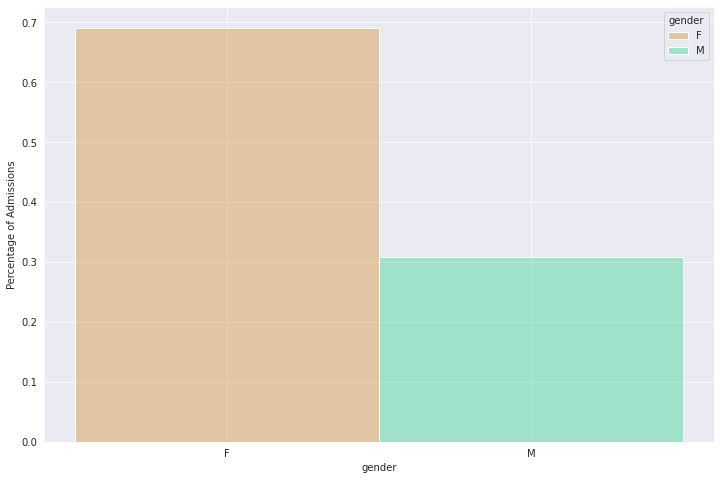

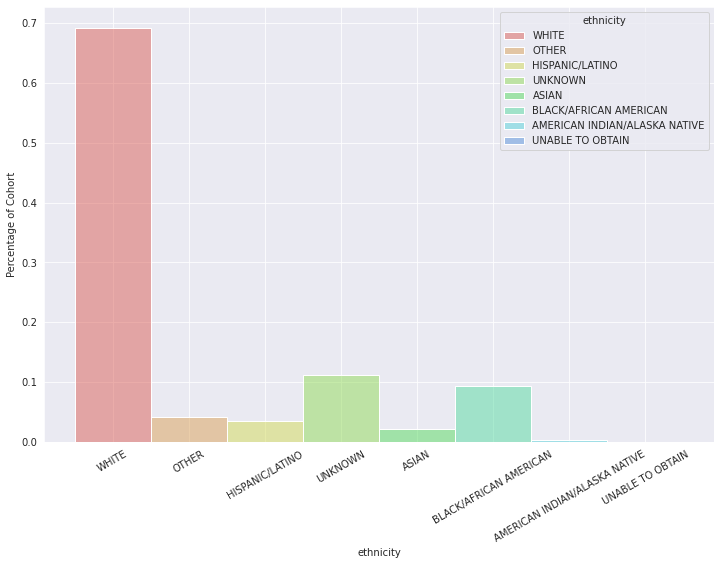

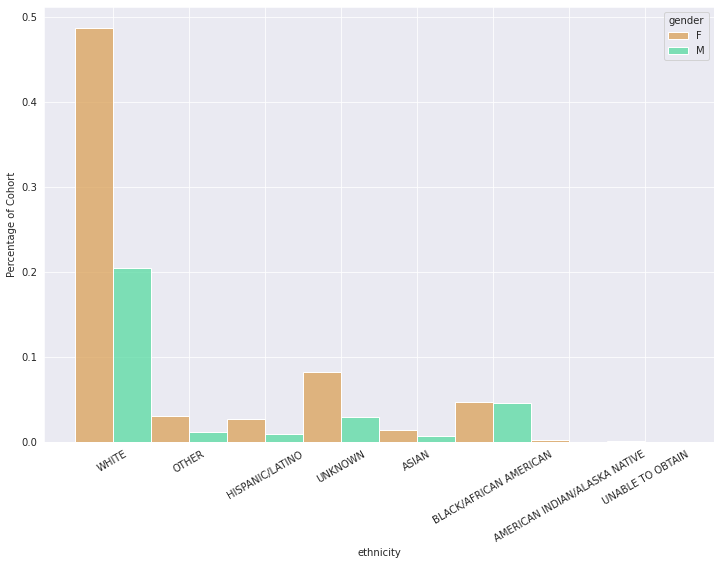

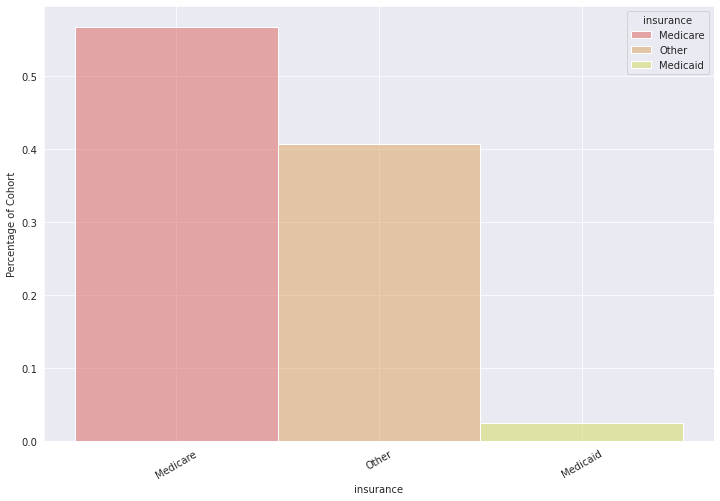

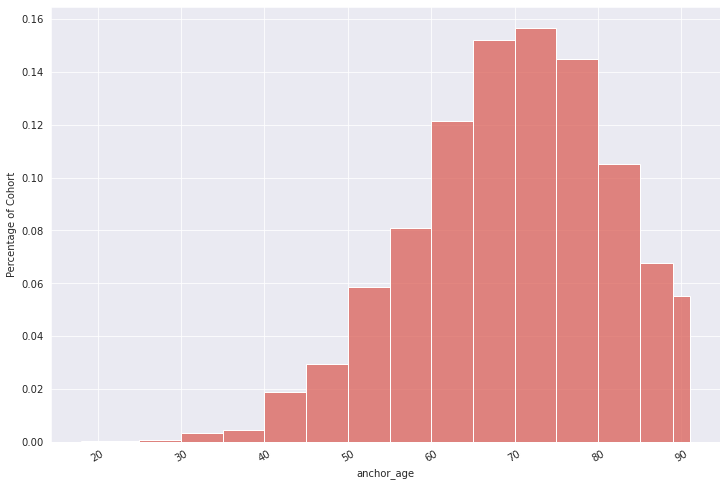

In [200]:
make_demog_plots(heart_cohort, 'heart')

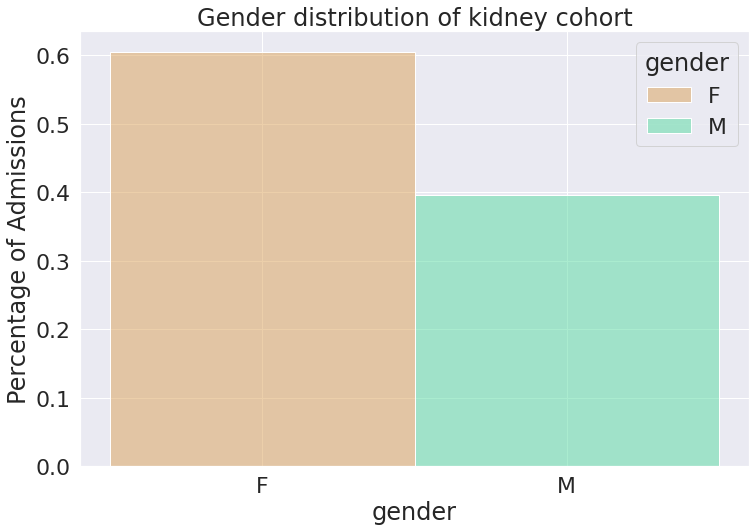

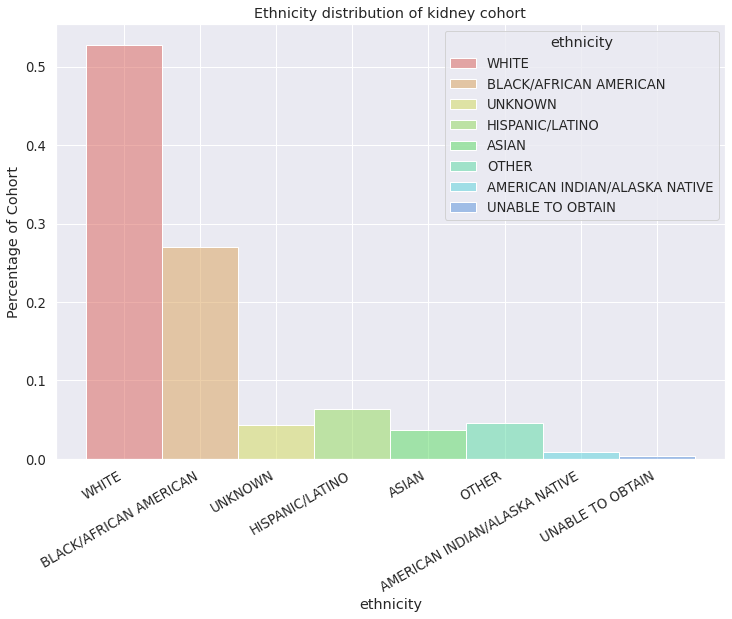

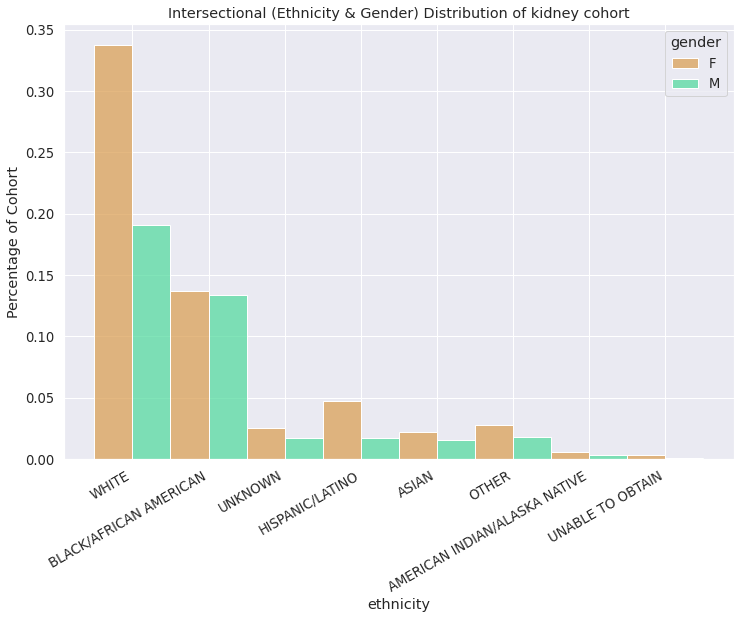

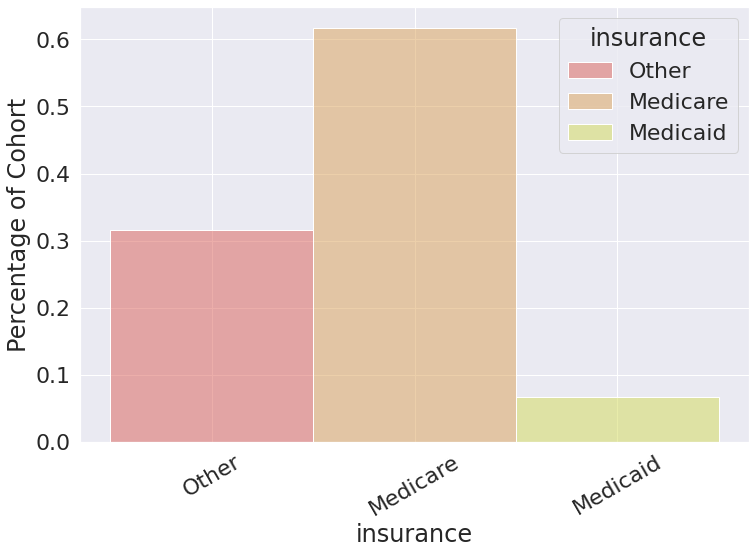

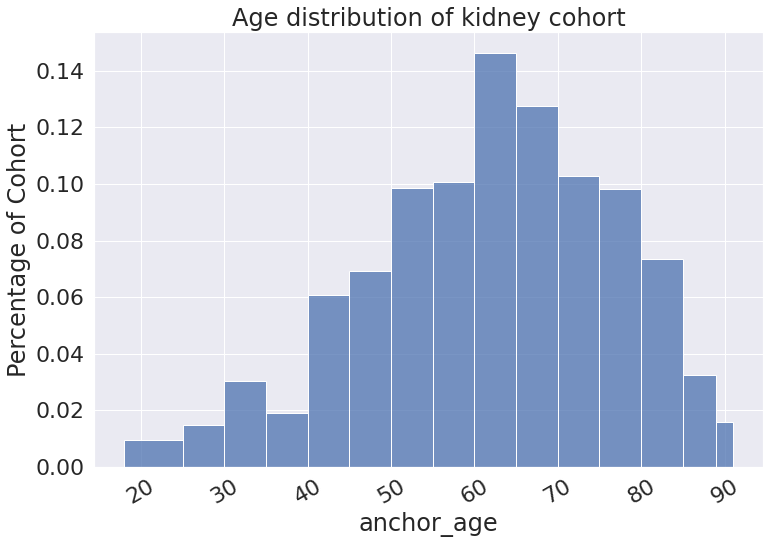

In [231]:
make_demog_plots(kidney_cohort, 'kidney')

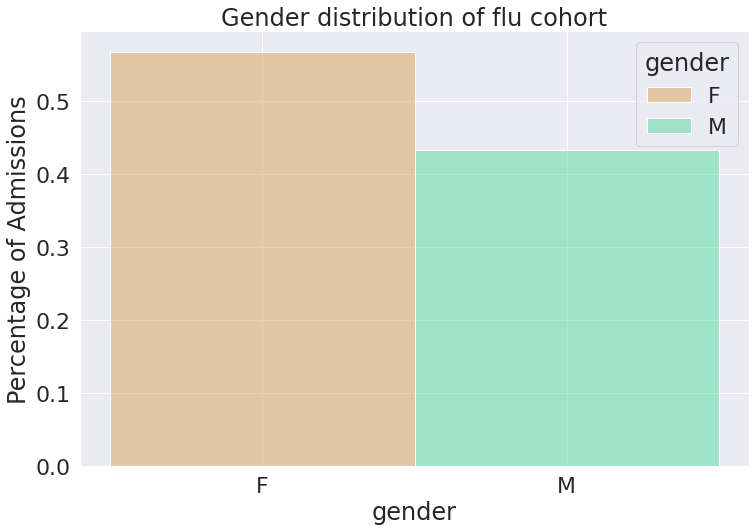

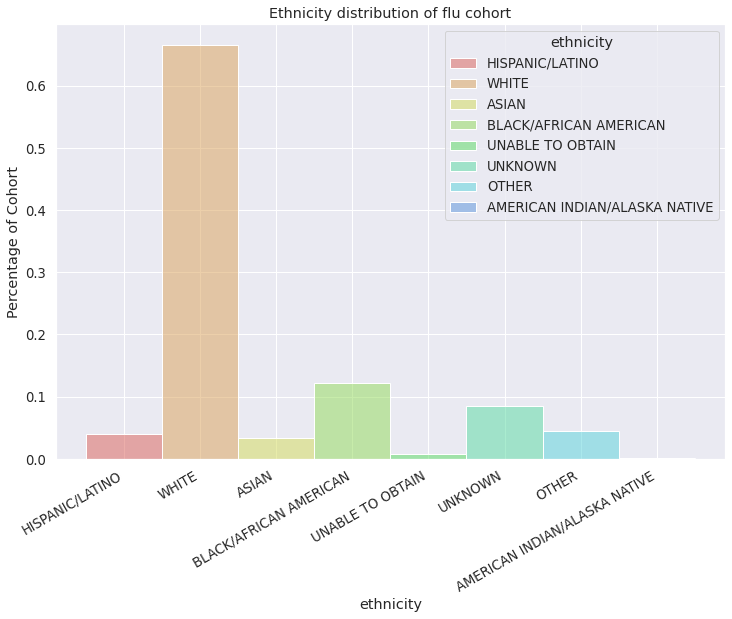

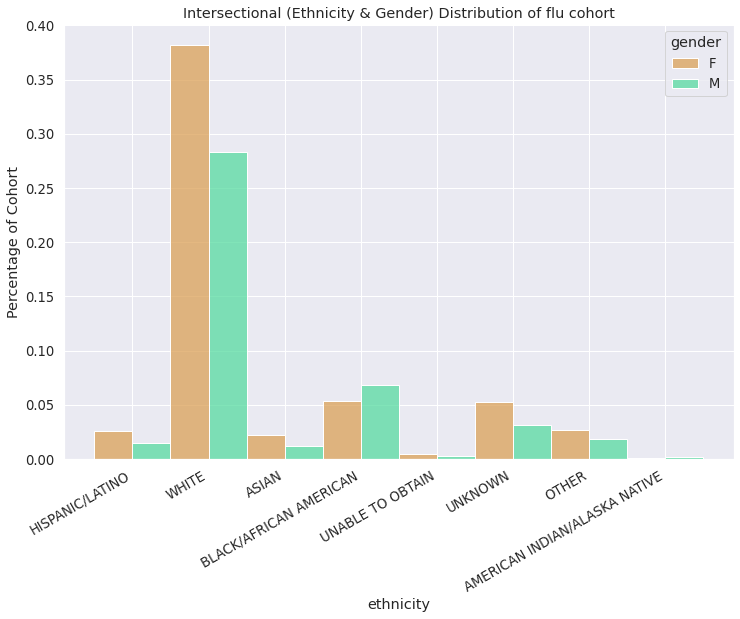

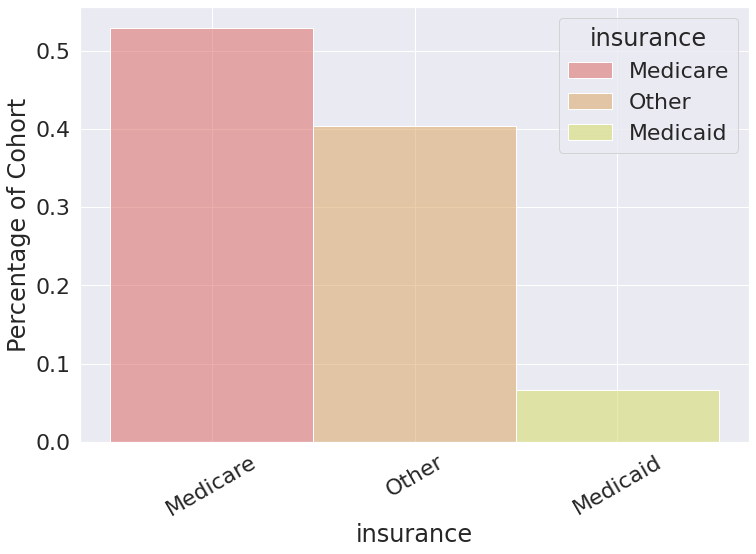

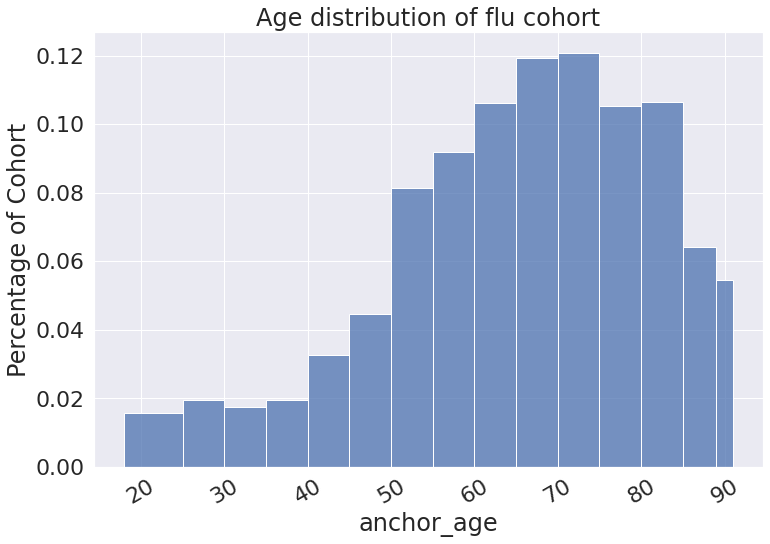

In [232]:
make_demog_plots(flu_cohort, 'flu')

In [205]:
kidney_cohort.columns

Index(['hadm_id', 'stay_id', 'timestamp', 'anchor_age', 'patientweight', 'los',
       'gender', 'alb', 'aniongap', 'bun', 'crp', 'ca', 'chloride',
       'creatinine', 'fibrinogen', 'glucose', 'hgb', 'k', 'mg', 'na', 'p',
       'platelets', 'troponin', 'wbc', 'apneainterval', 'artco2p', 'arto2p',
       'expratio', 'hr', 'inspratio', 'insptime', 'nibpd', 'nibpm', 'nibps',
       'pip', 'rr', 'spo2', 'temp', 'urine', 'vm', 'vt', 'betablockers',
       'ca-iv', 'ca-noniv', 'cablockers', 'dextrose', 'fluids', 'insulin',
       'k-iv', 'loopdiuretics', 'mg-iv', 'mg-noniv', 'p-iv', 'p-noniv',
       'pnutrition', 'ponutrition', 'packedrbc', 'paralytics', 'sedation',
       'tpnutrition', 'vasoactive', 'vasopressors', 'vent', 'hours-k-iv',
       'hours-mg-noniv', 'hours-p-iv', 'hours-mg-iv', 'subject_id',
       'insurance', 'language', 'marital_status', 'ethnicity'],
      dtype='object')

In [206]:
len(kidney_cohort.stay_id.unique())

2346

18761